In [1]:
import pandas as pd
import numpy as np
import json 
import math
import collections
import networkx as nx
from matplotlib import pyplot as plt
import random

from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


# Networks Creation
## Real world

In [2]:
G = nx.read_weighted_edgelist('/content/drive/Shareddrives/SNA Project/data/tuscany_backboned.weighted.edgelist')


In [3]:
N = len(G.nodes)
L = len(G.edges)
density = nx.density(G)
degrees = [d for n, d in G.degree()]
weights = sorted([G.edges[edge]['weight'] for edge in G.edges()], reverse=True)
print(N,L)
print(density)

15077 136686
0.0012026879688070856


Text(0, 0.5, 'cumulative number of edges')

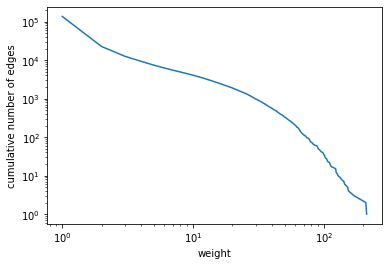

In [ ]:
weightsCount = collections.Counter(weights)
w, cnt = zip(*weightsCount.items())

cumcount = [0]
for i, c in enumerate(cnt):
    cumcount.append(c + cumcount[-1])
cumcount = cumcount[1:]
plt.plot(w, cumcount, linestyle = '-')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('weight')
plt.ylabel('cumulative number of edges')

In [ ]:
components =  [c for c in sorted(nx.connected_components(G), key=len, reverse=True)]
avg_size = np.average([len(c) for c in components[1:]])
print('average componets size: ', avg_size)
print(len(components))
print([len(c) for c in components[:20]],'etc...')

C = G.subgraph(components[0])

average componets size:  2.176470588235294
35
[15003, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2] etc...


In [ ]:
nx.write_weighted_edgelist(G,'/content/drive/Shareddrives/SNA Project/network_analysis/data/RW.weighted.edgelist')

In [ ]:
nx.write_adjlist(G,'/content/drive/Shareddrives/SNA Project/network_analysis/data/RW.adjlist')

### Erdős-Rényi

In [ ]:
n = len(G.nodes)
p = nx.density(G)
ER = nx.erdos_renyi_graph(n, p)
print(len(ER.nodes), len(ER.edges()))
print(nx.density(ER))

15077 137080
0.0012061547397983357


In [ ]:
nx.write_adjlist(ER,"/content/drive/Shareddrives/SNA Project/network_analysis/data/ER.adjlist")

### Barabási–Albert

In [ ]:
n = len(G.nodes)
m = math.floor(np.average([degrees])/2)
BA = nx.barabasi_albert_graph(n, m, seed=None)

In [ ]:
print(BA.number_of_nodes())
print(len(BA.edges()))
print(nx.density(BA))

15077
135612
0.0011932379382370286


In [ ]:
nx.write_adjlist(BA,"/content/drive/Shareddrives/SNA Project/network_analysis/data/BA.adjlist")

### Watts Strogatz

In [ ]:
n = len(G.nodes)
k = math.floor(np.average(degrees))
p = np.std(degrees) / np.max(degrees)
WS = nx.watts_strogatz_graph(n, k , p, seed=None)

print(WS.number_of_nodes())
print(len(WS.edges()))
print(nx.density(WS))

15077
135693
0.0011939506500397983


In [ ]:
nx.write_adjlist(WS,"/content/drive/Shareddrives/SNA Project/network_analysis/data/WS.adjlist")

## Configuration Model

In [4]:

CM = nx.configuration_model(degrees,create_using=nx.Graph())

In [5]:
print(CM.number_of_nodes())
print(len(CM.edges()))
print(nx.density(CM))

15077
136455
0.0012006554203325204


In [9]:
nx.write_adjlist(CM,"/content/drive/Shareddrives/SNA Project/network_analysis/data/CM.adjlist")